## HW1 - generate block simulation data and solve for the parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import MatrixMethods as mm
from SingleImage import SingleImage
from ImageBlock import ImageBlock
from BlockSimulation import *

## Part 1 - Simulate block of images

In [2]:
a = SimulateBlock(50, (36, 24), overlap=0.6 , num_images=4, tie_pattern='3 mid frame', control_pattern='random block',num_control_points=10, rotaions_sigma=200, altitude=1000)

block = a.simulate_block()

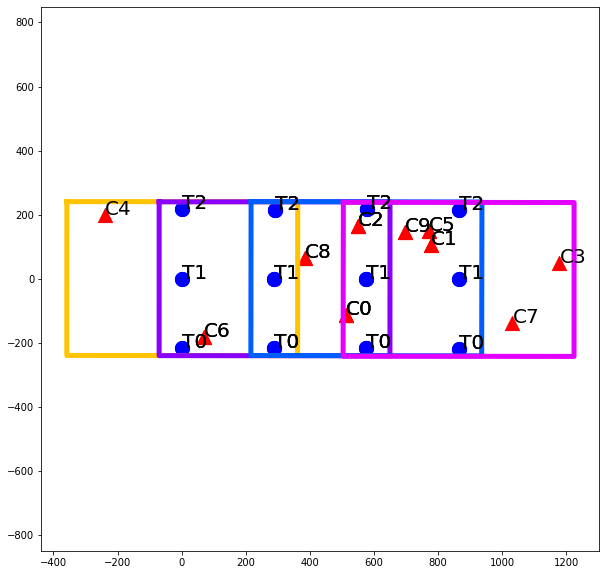

In [3]:
ax = block.draw_block(anotate=True)
ax.axis('equal')
plt.show()

In [4]:
block.describe_block()

Images EOP:
   Image     X0   Y0      Z0     omega       phi     kappa
0    0.0    0.0  0.0  1000.0  0.000808 -0.001498 -0.000510
1    1.0  288.0  0.0  1000.0  0.000351 -0.001401 -0.000196
2    2.0  576.0  0.0  1000.0  0.000436 -0.000052 -0.001679
3    3.0  864.0  0.0  1000.0 -0.001466  0.000196 -0.000913

Tie points:
    x     y name image_id           X           Y             Z  num_images
0   0 -10.8   T0        0    1.387556 -215.154410  1.136868e-13           2
1   0   0.0   T1        0    1.498018    0.808213  0.000000e+00           2
2   0  10.8   T2        0    1.608519  216.846324  0.000000e+00           2
3   0 -10.8   T0        1  289.359000 -215.632926  0.000000e+00           3
4   0   0.0   T1        1  289.401443    0.350923  0.000000e+00           3
5   0  10.8   T2        1  289.443892  216.367542  1.136868e-13           3
6   0 -10.8   T0        2  575.689142 -215.543349  1.136868e-13           3
7   0   0.0   T1        2  576.051707    0.436037  0.000000e+00         

## Part 2 - Bundle Adjustment

In [6]:
img = block.images[0]
Compute3DRotationMatrix(*img.exteriorOrientationParameters[3:])

array([[ 9.9999875e-01,  5.1027699e-04, -1.4980161e-03],
       [-5.1148812e-04,  9.9999958e-01, -8.0821215e-04],
       [ 1.4976029e-03,  8.0897741e-04,  9.9999857e-01]], dtype=float32)

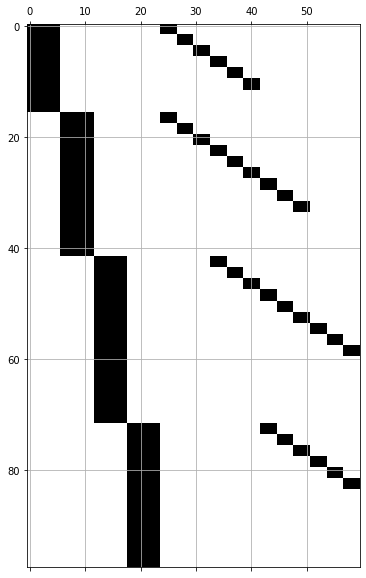

In [8]:
# drawing A matrix
A = block.ComputeDesignMatrix()
plt.figure(figsize=(10,10))
plt.spy(A)
plt.grid()
plt.show()